In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.


#if running locally, run this so seaborn runs the graphs inline:
#sns.plt.show()   # run this one if you want to run every graph as separate window. 
%matplotlib inline

In [2]:
# First, we'll import pandas, a data processing and CSV file I/O library
import pandas as pd

# We'll also import seaborn, a Python graphing library
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid", color_codes=True)

# Next, we'll load the Iris flower dataset, which is in the "../input/" directory

#  note: don't use this is run local iris = pd.read_csv("../input/Iris.csv") # the iris dataset is now a Pandas DataFrame
iris = pd.read_csv("./input/Iris.csv") # the iris dataset is now a Pandas DataFrame


# Let's see what's in the iris data - Jupyter notebooks print the result of the last thing you do
iris.head()




,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
################  Trying and failing to get the .head() to print nice with lines between 
################  the table rows.

#from ipywidgets import *
#import pandas as pd
#iris_Pretty = PrettyTable(iris)
#iris_Pretty

#from ipywidgets import PrettyTable
#iris_pretty = PrettyTable(iris)

In [3]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
####  attempted to count how many species and number of sampels for each species
####  not sure why it is executing the command twice? The dataset only has 150 entries?
iris["Species"].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [21]:
# The first way we can plot things is using the .plot extension from Pandas dataframes
# We'll use this to make a scatterplot of the Iris features.
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

In [6]:
### finding descriptive statistics for each species, starting with Iris-versicolor. 

iris_ve = iris.loc[iris['Species'] == "Iris-versicolor"]
iris_ve.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,75.50000,5.936000,2.770000,4.260000,1.326000
std,14.57738,0.516171,0.313798,0.469911,0.197753
min,51.00000,4.900000,2.000000,3.000000,1.000000
25%,63.25000,5.600000,2.525000,4.000000,1.200000
50%,75.50000,5.900000,2.800000,4.350000,1.300000
75%,87.75000,6.300000,3.000000,4.600000,1.500000
max,100.00000,7.000000,3.400000,5.100000,1.800000


In [7]:
### finding descriptive statistics for each species. This is Iris-virginica.
iris_vi = iris.loc[iris['Species'] == "Iris-virginica"]
iris_vi.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.00000,50.000000,50.000000,50.00000
mean,125.50000,6.58800,2.974000,5.552000,2.02600
std,14.57738,0.63588,0.322497,0.551895,0.27465
min,101.00000,4.90000,2.200000,4.500000,1.40000
25%,113.25000,6.22500,2.800000,5.100000,1.80000
50%,125.50000,6.50000,3.000000,5.550000,2.00000
75%,137.75000,6.90000,3.175000,5.875000,2.30000
max,150.00000,7.90000,3.800000,6.900000,2.50000


In [8]:
### finding descriptive statistics for each species. This is Iris-setosa. 
iris_s = iris.loc[iris['Species'] == "Iris-setosa"]
iris_s.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.00000,50.000000,50.000000,50.00000
mean,25.50000,5.00600,3.418000,1.464000,0.24400
std,14.57738,0.35249,0.381024,0.173511,0.10721
min,1.00000,4.30000,2.300000,1.000000,0.10000
25%,13.25000,4.80000,3.125000,1.400000,0.20000
50%,25.50000,5.00000,3.400000,1.500000,0.20000
75%,37.75000,5.20000,3.675000,1.575000,0.30000
max,50.00000,5.80000,4.400000,1.900000,0.60000


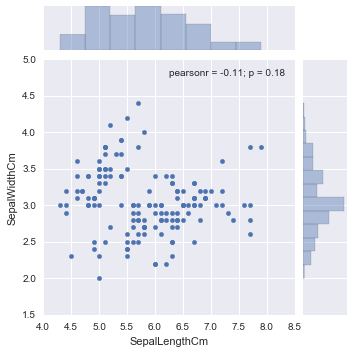

In [22]:
# We can also use the seaborn library to make a similar plot
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, size=5)

In [17]:
### A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris_s, size=10)
#sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris_vi, size=5)

In [11]:
# One piece of information missing in the plots above is what species each plant is
# We'll use seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(iris, hue="Species", size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

In [12]:
sns.FacetGrid(iris, hue="Species", size=5) \
   .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
   .add_legend()

In [13]:
sns.FacetGrid(iris, hue="Species", size=5) \
   .map(plt.scatter, "PetalLengthCm", "SepalLengthCm") \
   .add_legend()

In [14]:
sns.FacetGrid(iris, hue="Species", size=5) \
   .map(plt.scatter, "SepalWidthCm", "PetalWidthCm") \
   .add_legend()

In [18]:
##### trying a Joint kernel density estimate
g = sns.jointplot(x="SepalWidthCm", y="PetalLengthCm", data=iris, kind="kde", size=7, space=0)


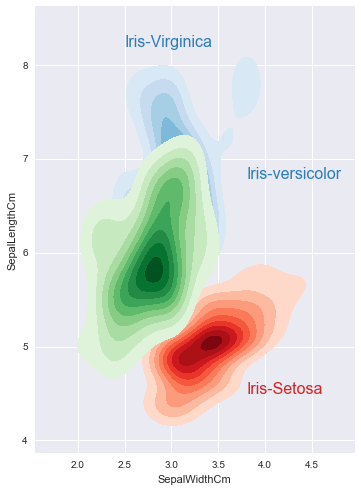

In [23]:
### adding to the previous plot by using kde plot fo colorize gradients by species. 

sns.set(style="darkgrid")


# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

#### this are the df subsets of iris :  iris_s, iris_vi, iris_ve

#### Draw the two density plots
ax = sns.kdeplot(iris_s.SepalWidthCm, iris_s.SepalLengthCm,
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(iris_vi.SepalWidthCm, iris_vi.SepalLengthCm,
                 cmap="Blues", shade=True, shade_lowest=False)
ax = sns.kdeplot(iris_ve.SepalWidthCm, iris_ve.SepalLengthCm,
                 cmap="Greens", shade=True, shade_lowest=False)

#### Add labels to the plot
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
green = sns.color_palette("Blues")[-2]
ax.text(2.5, 8.2, "Iris-Virginica", size=16, color=blue)
ax.text(3.8, 4.5, "Iris-Setosa", size=16, color=red)
ax.text(3.8, 6.8, "Iris-versicolor", size=16, color=green)